In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 타이타닉 데이터 로드
df = pd.read_csv("train.csv") 

In [ ]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

def substrings_in_string(big_string, substrings, default=np.nan):
    if pd.isnull(big_string):
        return default
    for substring in substrings:
        if substring in big_string:
            return substring
    return default
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
df['Title']=df.apply(replace_titles, axis=1)

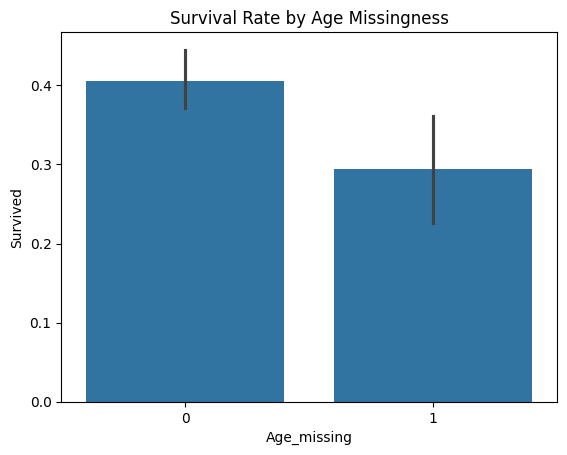

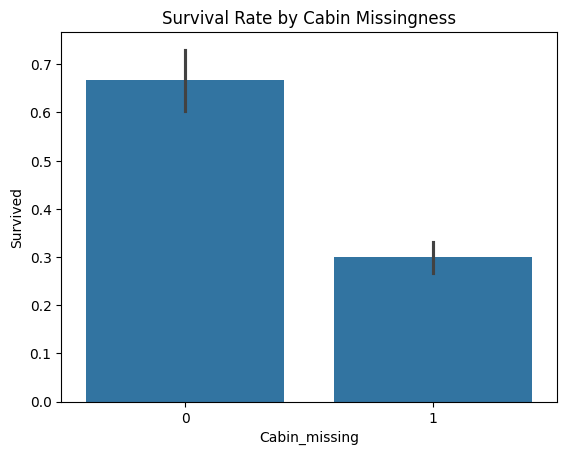

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Age_missing'] = df['Age'].isnull().astype(int)
df['Cabin_missing'] = df['Cabin'].isnull().astype(int)

sns.barplot(x='Age_missing', y='Survived', data=df)
plt.title('Survival Rate by Age Missingness')
plt.show()

sns.barplot(x='Cabin_missing', y='Survived', data=df)
plt.title('Survival Rate by Cabin Missingness')
plt.show()

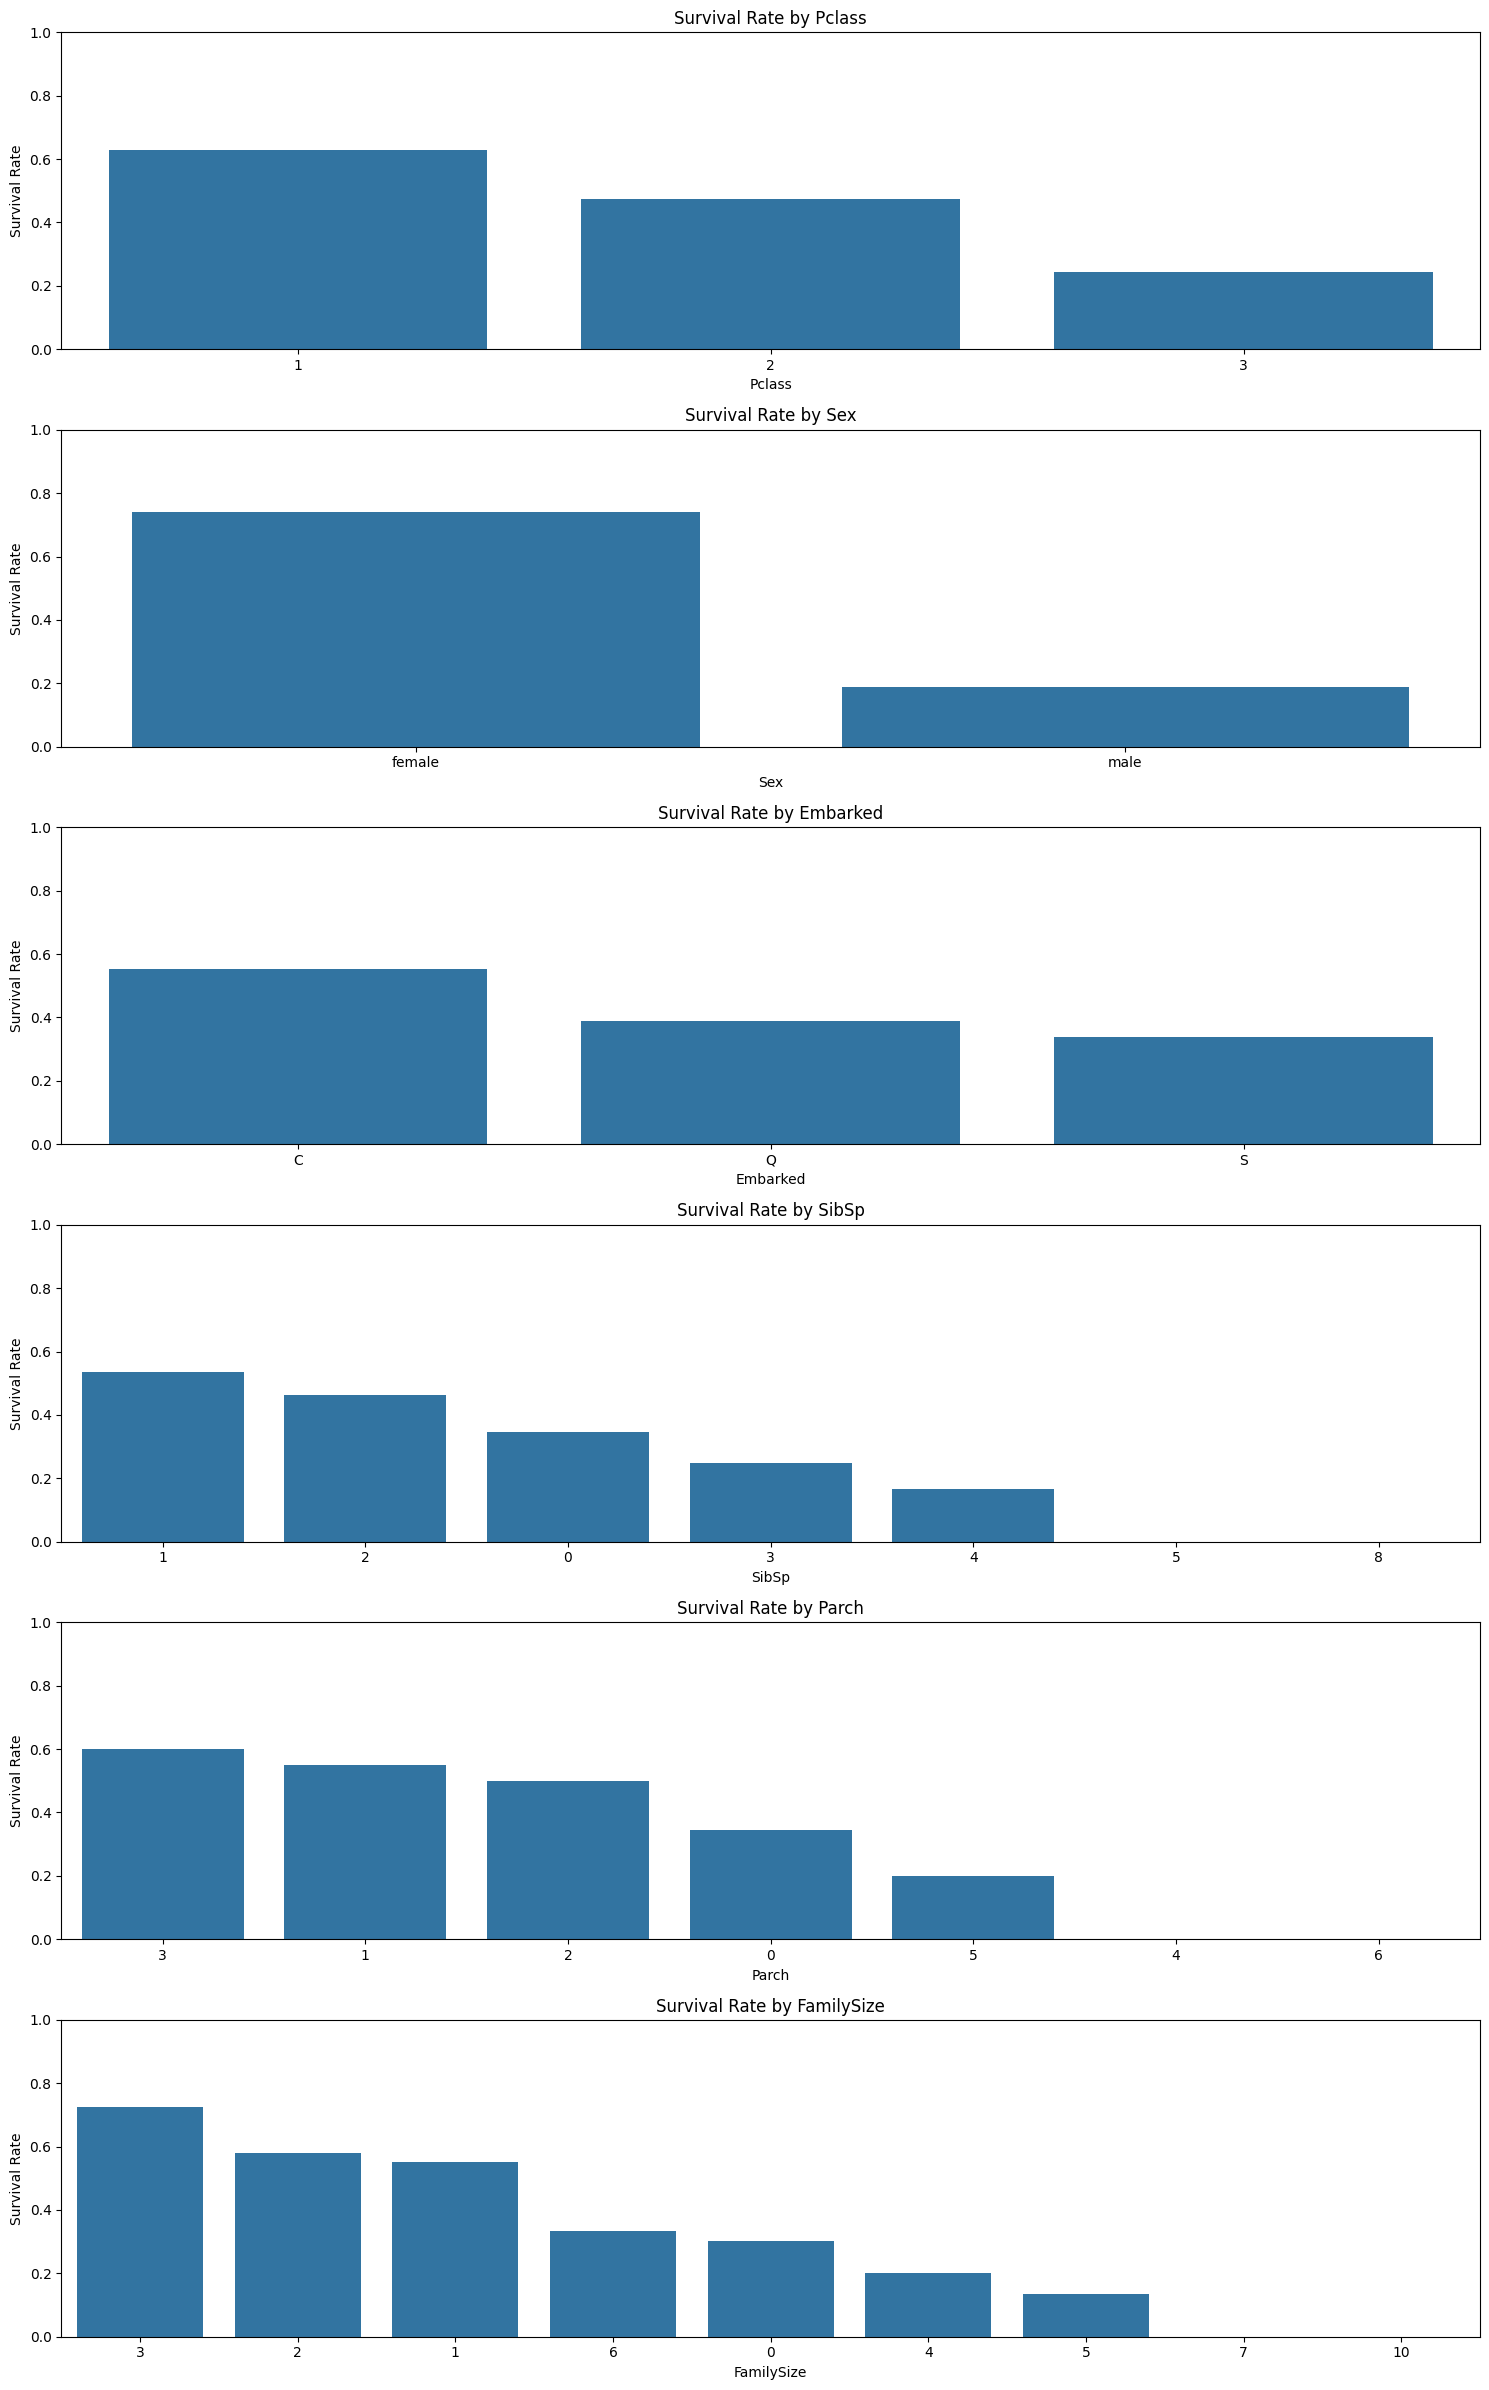

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
# 시각화할 범주형 컬럼 리스트
columns = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'FamilySize', 'Cabin']

# 그래프 설정
plt.figure(figsize=(15, 4 * len(columns)))

for i, col in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    # 그룹별 생존률 계산
    survival_rate = df.groupby(col)['Survived'].mean().sort_values(ascending=False)
    
    # 시각화
    sns.barplot(x=survival_rate.index.astype(str), y=survival_rate.values)
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Survival Rate')
    plt.ylim(0, 1)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
title_mean_age = df.groupby('Title')['Age'].mean().astype(int)
title_mean_age

#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(
    lambda x: substrings_in_string(x, cabin_list,'Unknown')
    )


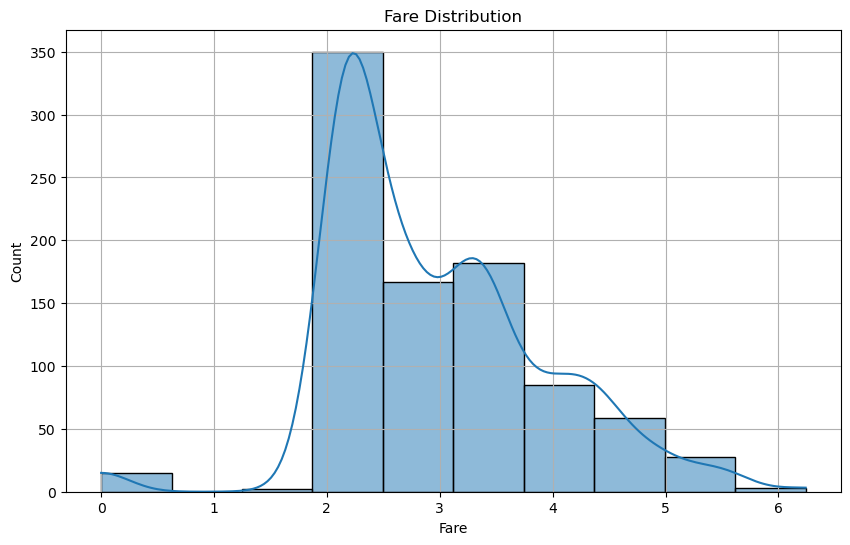

In [12]:
df['Fare_log'] = df['Fare'].apply(lambda x: np.log(x + 1))


plt.figure(figsize=(10, 6))
sns.histplot(df['Fare_log'] , bins=10, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [11]:
df[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr


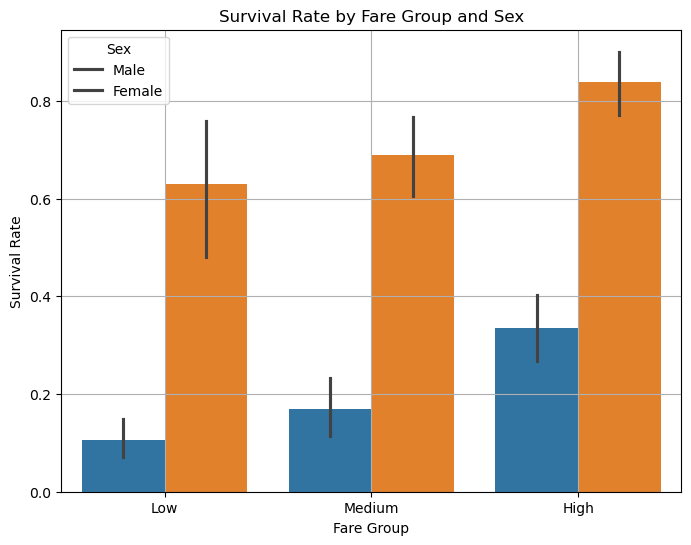

In [13]:
df['FareGroup'] = pd.qcut(df['Fare'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8,6))
sns.barplot(data=df, x='FareGroup', y='Survived', hue='Sex')
plt.title('Survival Rate by Fare Group and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Group')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.grid(True)
plt.show()